In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

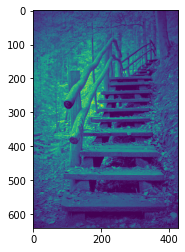

In [17]:
image = cv2.imread("pic.jpg", 0)
plt.imshow(image)

In [18]:
g = lambda x, y, sigma: math.exp(-(x**2 + y**2) / (2 * sigma**2))

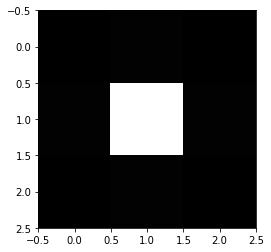

In [19]:
filter_size = 3
gaussian_filter = np.zeros((filter_size, filter_size))
sigma = 1
x_coords = y_coords = np.array([-3, 0, 3])

for x in range(filter_size):
    for y in range(filter_size):
        gaussian_filter[x, y] = g(x_coords[x], y_coords[y], sigma)

plt.imshow(gaussian_filter, cmap=plt.cm.gray)

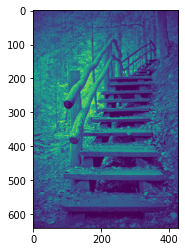

In [20]:
def gaussian_filter_func(img_mat):
    for row in range(img_mat.shape[0]):
        for col in range(img_mat.shape[1]):
            if row != 0 and col != 0 and row != img_mat.shape[0] - 1 and col != img_mat.shape[1] - 1:
                chunk = img_mat[row-1:row+2, col-1:col+2]
                img_mat[row, col] = np.sum(np.multiply(chunk, gaussian_filter))
            else:
                img_mat[row, col] = 0
    return img_mat

filtered_image = gaussian_filter_func(image)
plt.imshow(filtered_image)